In [68]:
!pip install keras==2.1.2
!pip install git+https://github.com/rcmalli/keras-vggface.git

In [60]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from numpy import asarray
from PIL import Image
from scipy.spatial.distance import cosine
import cv2, os
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace


In [61]:
def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    face = detector.detect_faces(image)

    x1, y1, width, height = face[0]['box']
    x2, y2 = x1 + width, y1 + height

    # extract the face
    face_boundary = image[y1:y2, x1:x2]

    image = cv2.resize(face_boundary, required_size)

    return image

In [62]:
def get_model_scores(faces):
    samples = asarray(faces, 'float32')

    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')

    # perform prediction
    return model.predict(samples)

In [65]:
def search(test_path):
    image = plt.imread(test_path)
    plt.imshow(image)
    score_coll = {}
    for folder in os.listdir(facedata_dir):
        for image in os.listdir(facedata_dir + folder):
            img_path = facedata_dir + folder + '/' + image
            print("Comparing: \n" + test_path + " & " + img_path + "\n")
            f1 = extract_face_from_image(test_path)
            f2 = extract_face_from_image(img_path)
            m_scores = get_model_scores([f1,f2])
            score_coll[img_path] = cosine(m_scores[0], m_scores[1])
    score_coll = dict(sorted(score_coll.items(), key=lambda item: item[1]))
    print("Test predicted to be: " + list(score_coll)[0])
    plt.show()    
    return score_coll

Comparing: 
./tests/asor3.jpg & ./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg

Comparing: 
./tests/asor3.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg

Comparing: 
./tests/asor3.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg

Comparing: 
./tests/asor3.jpg & ./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg

Comparing: 
./tests/asor3.jpg & ./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg

Comparing: 
./tests/asor3.jpg & ./samples/Aaron_Sorkin/Aaron_Sorkin_0002.jpg

Comparing: 
./tests/asor3.jpg & ./samples/Aaron_Eckhart/Aaron_Eckhart_0001.jpg

Comparing: 
./tests/asor3.jpg & ./samples/Aaron_Pena/Aaron_Pena_0001.jpg

Test predicted to be: ./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg


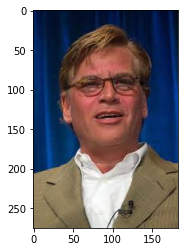

{
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg": 0.462974488735199,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0002.jpg": 0.4825969338417053,
    "./samples/Aaron_Eckhart/Aaron_Eckhart_0001.jpg": 0.6148312389850616,
    "./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg": 0.6434897780418396,
    "./samples/Aaron_Pena/Aaron_Pena_0001.jpg": 0.6688607037067413,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg": 0.692511111497879,
    "./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg": 0.7639591842889786,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg": 0.7650229632854462
}
Comparing: 
./tests/asor1.jpg & ./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg

Comparing: 
./tests/asor1.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg

Comparing: 
./tests/asor1.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg

Comparing: 
./tests/asor1.jpg & ./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg

Comparing: 
./tests/asor1.jpg & ./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg

Comparing: 
./tests

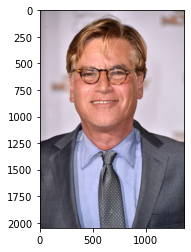

{
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg": 0.5427583456039429,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0002.jpg": 0.547653079032898,
    "./samples/Aaron_Eckhart/Aaron_Eckhart_0001.jpg": 0.5933100581169128,
    "./samples/Aaron_Pena/Aaron_Pena_0001.jpg": 0.6154671013355255,
    "./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg": 0.6305835247039795,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg": 0.6701729595661163,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg": 0.7486603856086731,
    "./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg": 0.7680418491363525
}
Comparing: 
./tests/agui1.jpg & ./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg

Comparing: 
./tests/agui1.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg

Comparing: 
./tests/agui1.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg

Comparing: 
./tests/agui1.jpg & ./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg

Comparing: 
./tests/agui1.jpg & ./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg

Comparing: 
./test

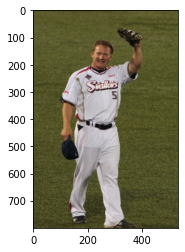

{
    "./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg": 0.2716444134712219,
    "./samples/Aaron_Eckhart/Aaron_Eckhart_0001.jpg": 0.5900983810424805,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg": 0.6370267868041992,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg": 0.6498049199581146,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg": 0.743974357843399,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0002.jpg": 0.749309241771698,
    "./samples/Aaron_Pena/Aaron_Pena_0001.jpg": 0.76896932721138,
    "./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg": 0.7910361289978027
}
Comparing: 
./tests/aeck2.jpg & ./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg

Comparing: 
./tests/aeck2.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg

Comparing: 
./tests/aeck2.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg

Comparing: 
./tests/aeck2.jpg & ./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg

Comparing: 
./tests/aeck2.jpg & ./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg

Comparing: 
./tests/a

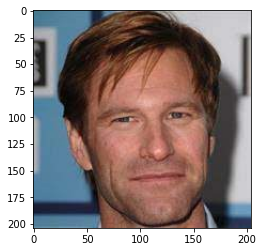

{
    "./samples/Aaron_Eckhart/Aaron_Eckhart_0001.jpg": 0.3369269371032715,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg": 0.6378503739833832,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg": 0.6524291336536407,
    "./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg": 0.6734238564968109,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg": 0.6734245121479034,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0002.jpg": 0.6819095611572266,
    "./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg": 0.6872410774230957,
    "./samples/Aaron_Pena/Aaron_Pena_0001.jpg": 0.769139975309372
}
Comparing: 
./tests/Aaron_Sorkin_0001.jpg & ./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg

Comparing: 
./tests/Aaron_Sorkin_0001.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg

Comparing: 
./tests/Aaron_Sorkin_0001.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg

Comparing: 
./tests/Aaron_Sorkin_0001.jpg & ./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg

Comparing: 
./tests/Aaron_Sorkin_0001.jpg & ./sa

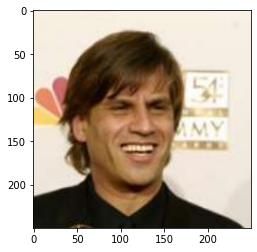

{
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg": 0,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0002.jpg": 0.3001159429550171,
    "./samples/Aaron_Eckhart/Aaron_Eckhart_0001.jpg": 0.6270810067653656,
    "./samples/Aaron_Pena/Aaron_Pena_0001.jpg": 0.655664473772049,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg": 0.7141300439834595,
    "./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg": 0.7282269299030304,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg": 0.7667434513568878,
    "./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg": 0.7921932339668274
}
Comparing: 
./tests/apei1.jpg & ./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg

Comparing: 
./tests/apei1.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg

Comparing: 
./tests/apei1.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg

Comparing: 
./tests/apei1.jpg & ./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg

Comparing: 
./tests/apei1.jpg & ./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg

Comparing: 
./tests/apei1.jpg & ./s

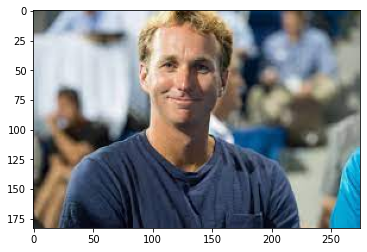

{
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg": 0.35485929250717163,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg": 0.3920275568962097,
    "./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg": 0.6370959579944611,
    "./samples/Aaron_Eckhart/Aaron_Eckhart_0001.jpg": 0.6600043475627899,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0002.jpg": 0.689453512430191,
    "./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg": 0.7030971944332123,
    "./samples/Aaron_Pena/Aaron_Pena_0001.jpg": 0.7235403954982758,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg": 0.7483469843864441
}
Comparing: 
./tests/asor2.jpg & ./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg

Comparing: 
./tests/asor2.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg

Comparing: 
./tests/asor2.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg

Comparing: 
./tests/asor2.jpg & ./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg

Comparing: 
./tests/asor2.jpg & ./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg

Comparing: 
./tes

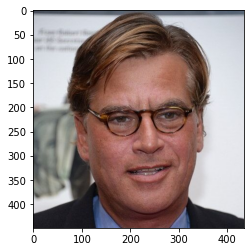

{
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0002.jpg": 0.4665939211845398,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg": 0.4968569278717041,
    "./samples/Aaron_Pena/Aaron_Pena_0001.jpg": 0.6064167618751526,
    "./samples/Aaron_Eckhart/Aaron_Eckhart_0001.jpg": 0.627973198890686,
    "./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg": 0.6663064062595367,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg": 0.7148787081241608,
    "./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg": 0.7350468337535858,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg": 0.7736958116292953
}
Comparing: 
./tests/apei2.jpg & ./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg

Comparing: 
./tests/apei2.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg

Comparing: 
./tests/apei2.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg

Comparing: 
./tests/apei2.jpg & ./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg

Comparing: 
./tests/apei2.jpg & ./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg

Comparing: 
./test

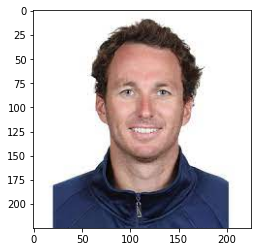

{
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg": 0.2780826687812805,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg": 0.3616487979888916,
    "./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg": 0.6407489776611328,
    "./samples/Aaron_Eckhart/Aaron_Eckhart_0001.jpg": 0.6749719381332397,
    "./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg": 0.675687313079834,
    "./samples/Aaron_Pena/Aaron_Pena_0001.jpg": 0.7289152145385742,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0002.jpg": 0.7292716801166534,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg": 0.7693338543176651
}
Comparing: 
./tests/aeck1.jpg & ./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg

Comparing: 
./tests/aeck1.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg

Comparing: 
./tests/aeck1.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg

Comparing: 
./tests/aeck1.jpg & ./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg

Comparing: 
./tests/aeck1.jpg & ./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg

Comparing: 
./test

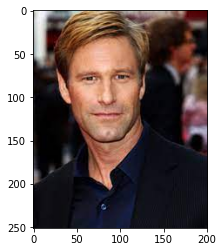

{
    "./samples/Aaron_Eckhart/Aaron_Eckhart_0001.jpg": 0.25293105840682983,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg": 0.5580406188964844,
    "./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg": 0.5881214439868927,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0002.jpg": 0.6701500713825226,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg": 0.6854715943336487,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg": 0.6948981583118439,
    "./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg": 0.7049130797386169,
    "./samples/Aaron_Pena/Aaron_Pena_0001.jpg": 0.7207738161087036
}
Comparing: 
./tests/apei3.jpg & ./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg

Comparing: 
./tests/apei3.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg

Comparing: 
./tests/apei3.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg

Comparing: 
./tests/apei3.jpg & ./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg

Comparing: 
./tests/apei3.jpg & ./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg

Comparing: 
./te

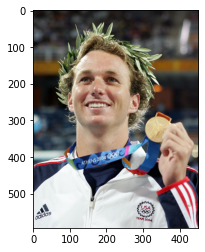

{
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg": 0.3081585764884949,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg": 0.3521067500114441,
    "./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg": 0.6444066762924194,
    "./samples/Aaron_Pena/Aaron_Pena_0001.jpg": 0.6950486302375793,
    "./samples/Aaron_Eckhart/Aaron_Eckhart_0001.jpg": 0.712282121181488,
    "./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg": 0.7355901598930359,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0002.jpg": 0.7369420528411865,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg": 0.758943498134613
}
Comparing: 
./tests/aeck3.jpg & ./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg

Comparing: 
./tests/aeck3.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg

Comparing: 
./tests/aeck3.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg

Comparing: 
./tests/aeck3.jpg & ./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg

Comparing: 
./tests/aeck3.jpg & ./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg

Comparing: 
./tests

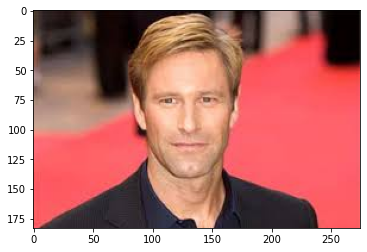

{
    "./samples/Aaron_Eckhart/Aaron_Eckhart_0001.jpg": 0.21373558044433594,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg": 0.5690132081508636,
    "./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg": 0.5749722421169281,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0002.jpg": 0.667277067899704,
    "./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg": 0.6762148141860962,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg": 0.6778607070446014,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg": 0.6881887018680573,
    "./samples/Aaron_Pena/Aaron_Pena_0001.jpg": 0.7303580045700073
}
Comparing: 
./tests/agui2.jpg & ./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg

Comparing: 
./tests/agui2.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg

Comparing: 
./tests/agui2.jpg & ./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg

Comparing: 
./tests/agui2.jpg & ./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg

Comparing: 
./tests/agui2.jpg & ./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg

Comparing: 
./tes

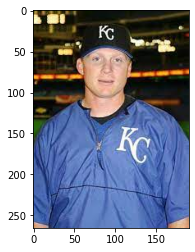

{
    "./samples/Aaron_Guiel/Aaron_Guiel_0001.jpg": 0.4052220582962036,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0003.jpg": 0.682732492685318,
    "./samples/Aaron_Eckhart/Aaron_Eckhart_0001.jpg": 0.6955415308475494,
    "./samples/Aaron_Pena/Aaron_Pena_0001.jpg": 0.7478305697441101,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0001.jpg": 0.7550553679466248,
    "./samples/Aaron_Patterson/Aaron_Patterson_0001.jpg": 0.7659292072057724,
    "./samples/Aaron_Peirsol/Aaron_Peirsol_0004.jpg": 0.7670959085226059,
    "./samples/Aaron_Sorkin/Aaron_Sorkin_0002.jpg": 0.7809094786643982
}


In [66]:
import json # For pretty printing

facedata_dir = './samples/'
test_dir = './tests/'

for test_img in os.listdir(test_dir):
    scores = search(test_dir + test_img)
    print(json.dumps(scores, sort_keys=False, indent=4))